# Importing Library

In [125]:
# Importing Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
import itertools

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

# Check library version
print("---Library version---", end = '\n\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---

pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Python For Machine Learning (Book)\Supervised Learning\Linear Regression
List Directory: ['.ipynb_checkpoints', 'Admission_Predict_Ver1.1.ipynb', 'catboost_info', 'Note.txt', 'Walmart_sales (Abandoned).ipynb']


# Importing Data

In [2]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Data\Admission_Predict_Ver1.1.csv")
with pd.option_context('display.max_rows', 9999):
    display(data.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
print(f'Sample: {data.shape[0]} record, Feature: {data.shape[1]}')

Sample: 500 record, Feature: 9


# Overview Data

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Preparation

In [54]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

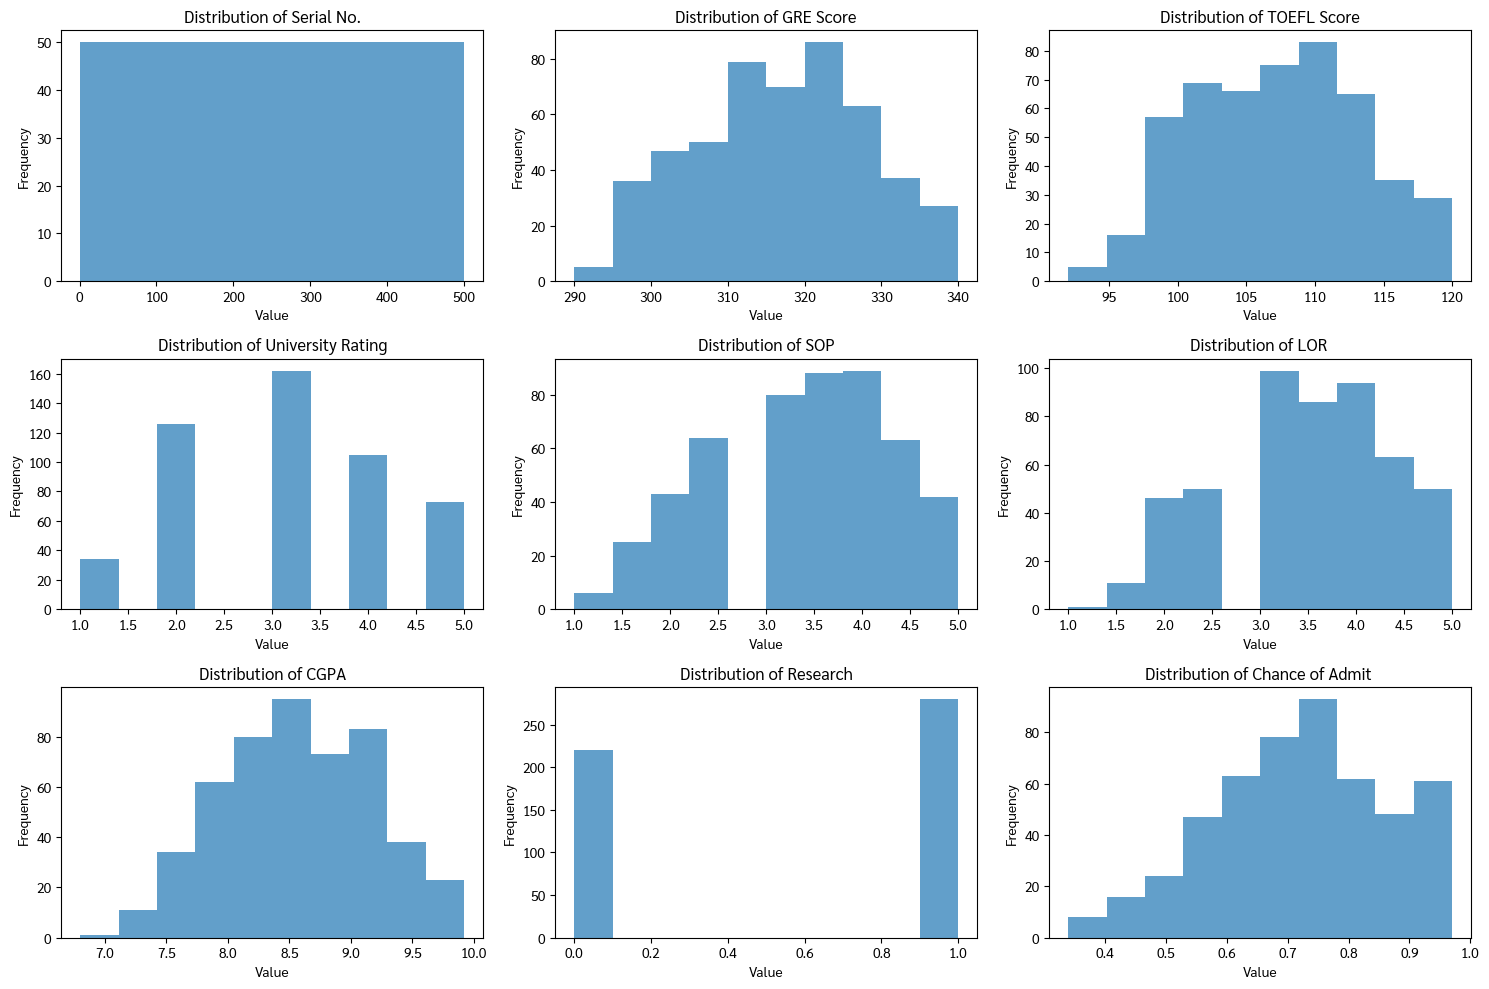

In [103]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot distribution of each column
for i, column in enumerate(data.columns):
    ax = axes[i]
    ax.hist(data[column], bins=10, alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

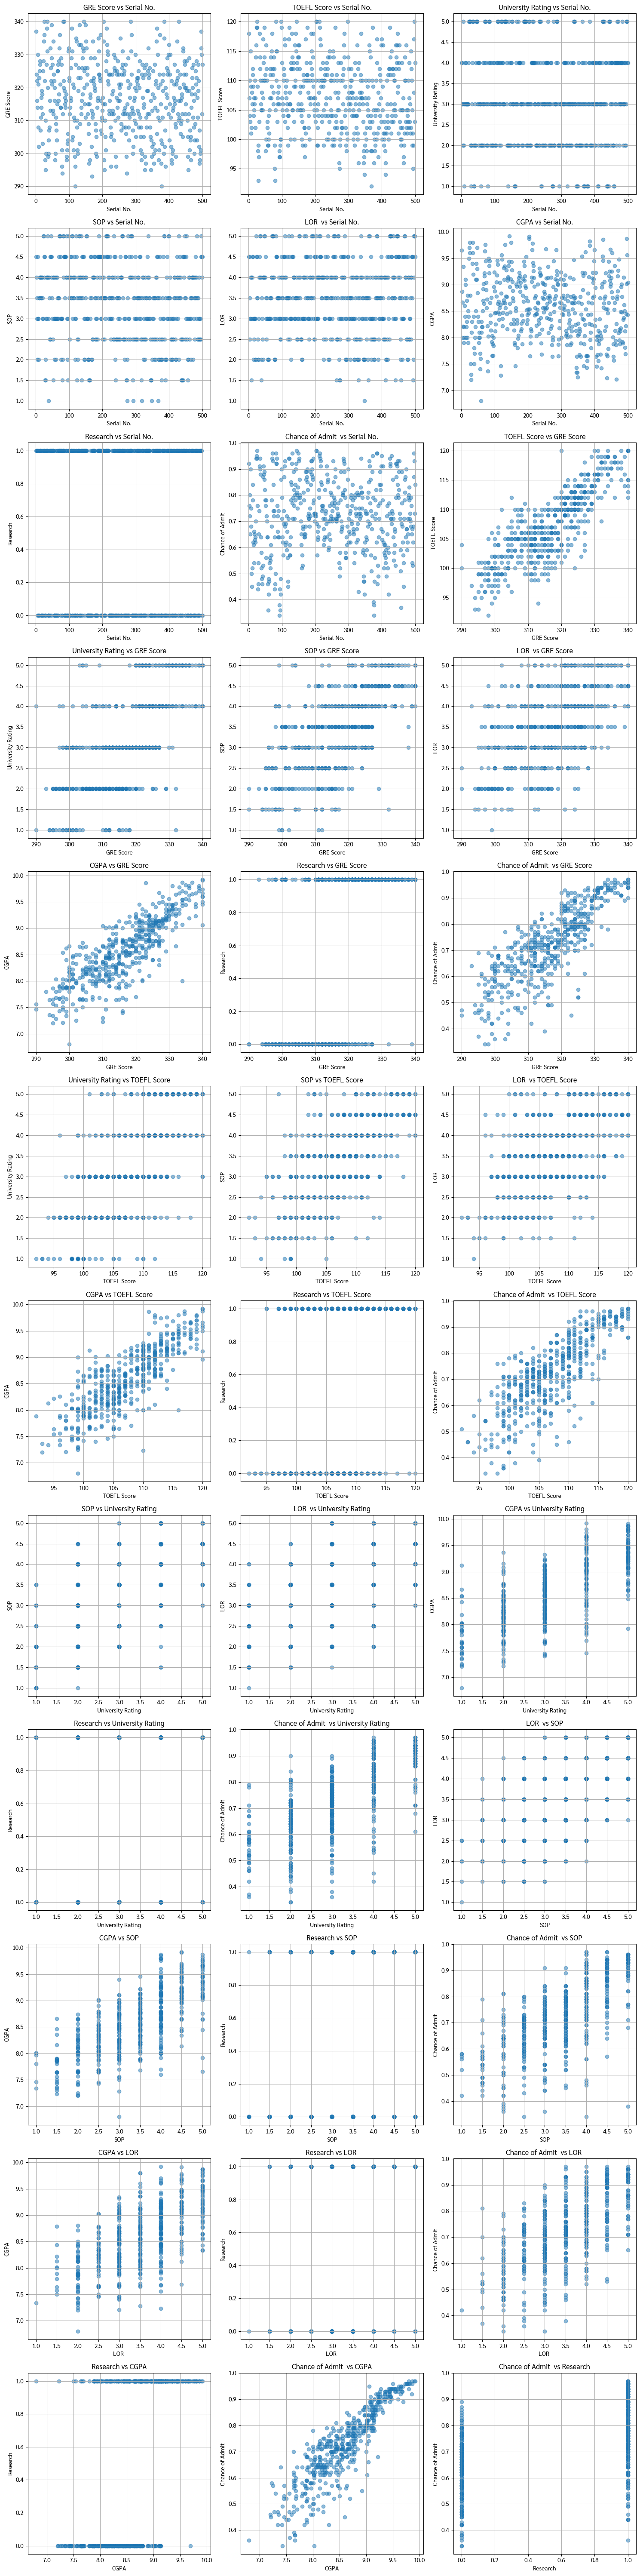

In [7]:
# Generate all possible combinations of scatter plots
combinations = list(itertools.combinations(data.columns, 2))

# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 3  # Number of columns in subplot layout
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

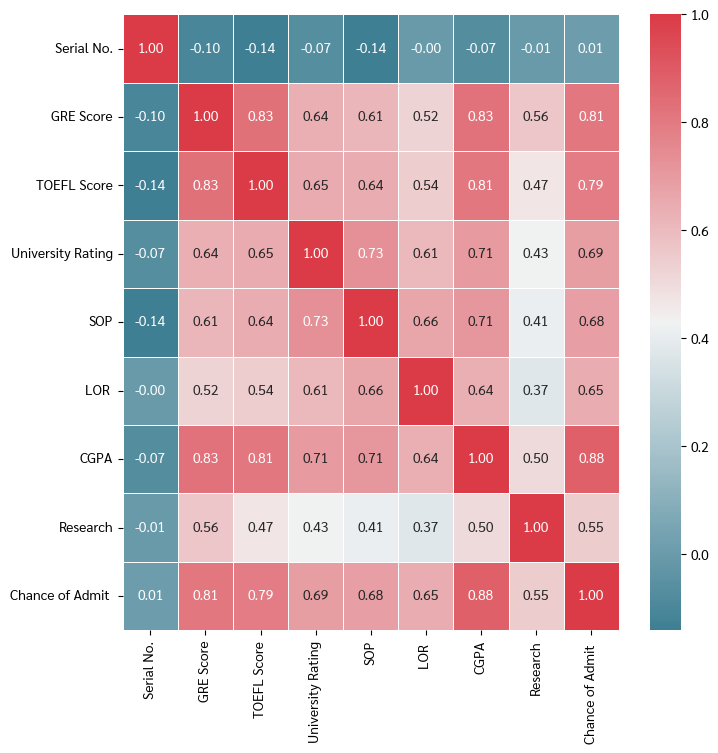

In [10]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap,linewidths=.5, annot=True, fmt=".2f")
plt.show()

# Model Development

## Extract Feature and Traget

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
data_X1 = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]
data_X2 = data[['GRE Score', 'TOEFL Score','CGPA']]
data_X3 = data[['University Rating', 'SOP','LOR ', 'Research']]

y = data['Chance of Admit ']

In [15]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Model data_X1

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_X1, y, random_state=0)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
print(f"y = {model.intercept_} ", end="")
for i, coef in enumerate(model.coef_):
    print(f"+ ({coef} * X{str(i+1)})", end="")
print()

y = -1.3538337573157126 + (0.0022155728118152113 * X1)+ (0.0026692947244477856 * X2)+ (0.005725304459882161 * X3)+ (0.0008242851876230901 * X4)+ (0.019162351211747138 * X5)+ (0.11505163175985805 * X6)+ (0.023481243638139866 * X7)


In [46]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('R-Squared (Train):', '{:.4f}'.format(train_score))
print('R-Squared (Test):', '{:.4f}'.format(test_score))

R-Squared (Train): 0.8283
R-Squared (Test): 0.7973


In [48]:
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('From X test')
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

From X test
Mean Squared Error: 0.003820408871044367
Root Mean Squared Error: 0.06180945616201753


# Loop

In [123]:
data_X = [data_X1, data_X2, data_X3]

for dataset in data_X:
    print('----------------------------------')
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print(f"y = {model.intercept_} ", end="")
    for i, coef in enumerate(model.coef_):
        print(f"+ ({coef} * {dataset.columns[i]})", end="")
    print()
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('R-Squared (Train):', '{:.4f}'.format(train_score))
    print('R-Squared (Test):', '{:.4f}'.format(test_score))
    
    y_predict = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)

    print('From X test')
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    
    print()
    
    feature_importance = pd.Series(model.coef_, index=dataset.columns).sort_values(ascending=False)

    print("Feature importance:")
    print(feature_importance)
    
    print('----------END----------')

----------------------------------
y = -1.3538337573157126 + (0.0022155728118152113 * GRE Score)+ (0.0026692947244477856 * TOEFL Score)+ (0.005725304459882161 * University Rating)+ (0.0008242851876230901 * SOP)+ (0.019162351211747138 * LOR )+ (0.11505163175985805 * CGPA)+ (0.023481243638139866 * Research)
R-Squared (Train): 0.8283
R-Squared (Test): 0.7973
From X test
Mean Squared Error: 0.003820408871044367
Root Mean Squared Error: 0.06180945616201753

Feature importance:
CGPA                 0.115052
Research             0.023481
LOR                  0.019162
University Rating    0.005725
TOEFL Score          0.002669
GRE Score            0.002216
SOP                  0.000824
dtype: float64
----------END----------
----------------------------------
y = -1.6295088947656424 + (0.002491070428884115 * GRE Score)+ (0.003154041373203794 * TOEFL Score)+ (0.14277743384735683 * CGPA)
R-Squared (Train): 0.8096
R-Squared (Test): 0.7860
From X test
Mean Squared Error: 0.004034906296678057
Root M

In [121]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor

# Define datasets
datasets = {
    'data_X1': data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']],
    'data_X2': data[['GRE Score', 'TOEFL Score','CGPA']],
    'data_X3': data[['University Rating', 'SOP','LOR ', 'Research']]
}

# Define models
models = [
    ['DecisionTree:', DecisionTreeRegressor()],
    ['Linear Regression:', LinearRegression()],
    ['RandomForest:', RandomForestRegressor()],
    ['KNeighbours:', KNeighborsRegressor(n_neighbors=2)],
    ['SVM:', SVR()],
    ['AdaBoostRegressor:', AdaBoostRegressor()],
    ['GradientBoostingRegressor:', GradientBoostingRegressor()],
    ['Xgboost:', XGBRegressor()],
    ['CatBoost:', CatBoostRegressor(logging_level='Silent')],
    ['Lasso:', Lasso()],
    ['Ridge:', Ridge()],
    ['BayesianRidge:', BayesianRidge()],
    ['ElasticNet:', ElasticNet()],
    ['HuberRegressor:', HuberRegressor()]
]

y = data['Chance of Admit ']

# Iterate over each dataset
for dataset_name, dataset in datasets.items():
    print(f"Results for {dataset_name}:")
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, random_state=0)
    
    lowest_rmse_model = None
    lowest_rmse = float('inf')
    
    # Iterate over each model
    for model_name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print(f"{model_name} RMSE: {rmse}")
        
        # Check if the current model has lower RMSE than the previous lowest
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            lowest_rmse_model = model_name
    
    # Print the name of the model with the lowest RMSE for the current dataset
    print()
    print(f"Model with lowest RMSE: {lowest_rmse_model} RMSE: {lowest_rmse}")
    print('\n')

Results for data_X1:
DecisionTree: RMSE: 0.08801817994028278
Linear Regression: RMSE: 0.06180945616201753
RandomForest: RMSE: 0.06146006963874997
KNeighbours: RMSE: 0.08391424193782603
SVM: RMSE: 0.07995262403690662
AdaBoostRegressor: RMSE: 0.06762992596538882
GradientBoostingRegressor: RMSE: 0.060740189111541755
Xgboost: RMSE: 0.06426205451889613
CatBoost: RMSE: 0.062115297088071404
Lasso: RMSE: 0.11799347499577753
Ridge: RMSE: 0.061880697216971835
BayesianRidge: RMSE: 0.061954885002986494
ElasticNet: RMSE: 0.09221053157443865
HuberRegressor: RMSE: 0.06655089108402742

Model with lowest RMSE: GradientBoostingRegressor: RMSE: 0.060740189111541755


Results for data_X2:
DecisionTree: RMSE: 0.09185205495795942
Linear Regression: RMSE: 0.06352091227838322
RandomForest: RMSE: 0.0640258686086248
KNeighbours: RMSE: 0.08939015605758836
SVM: RMSE: 0.07914128962555549
AdaBoostRegressor: RMSE: 0.06613967525213303
GradientBoostingRegressor: RMSE: 0.06429591895417042
Xgboost: RMSE: 0.0693108289530

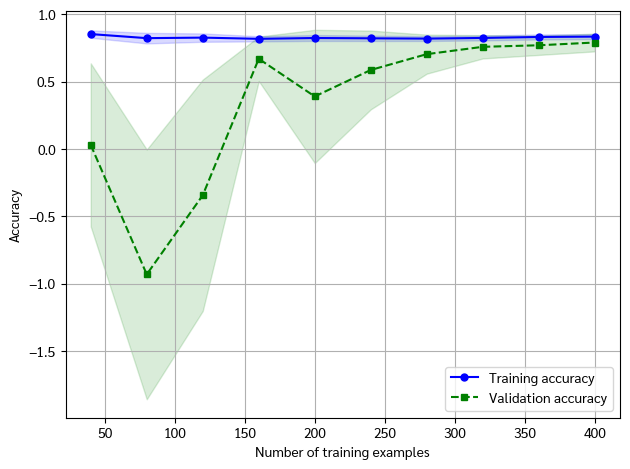

In [137]:
# Create a Linear Regression model
model = LinearRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, data.iloc[:, :-1], y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Add labels and legend
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()